# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



given the model that yo uhave generated using the classiers (random forest,), why did you choose the specific model present 
is it because of precision score, accuracy score, t score, f1 score

In [22]:
# Install required libraries (if not installed)
# pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
data = pd.read_csv('datasets/data/data.csv')
data.shape

(6819, 96)

In [3]:
# Take a quick look at the data
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [5]:
# Check for missing values
print(data.isnull().sum())


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [6]:
# Separate data into features and target class
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']


In [7]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()


# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(f"Training data shape: {x_train_scaled.shape}")
print(f"Testing data shape: {x_test_scaled.shape}")

Training data shape: (4773, 95)
Testing data shape: (2046, 95)


In [8]:
#Train a Logistic Regression Model
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred_lr = model.predict(x_test_scaled)
acc = (y_pred_lr == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.962


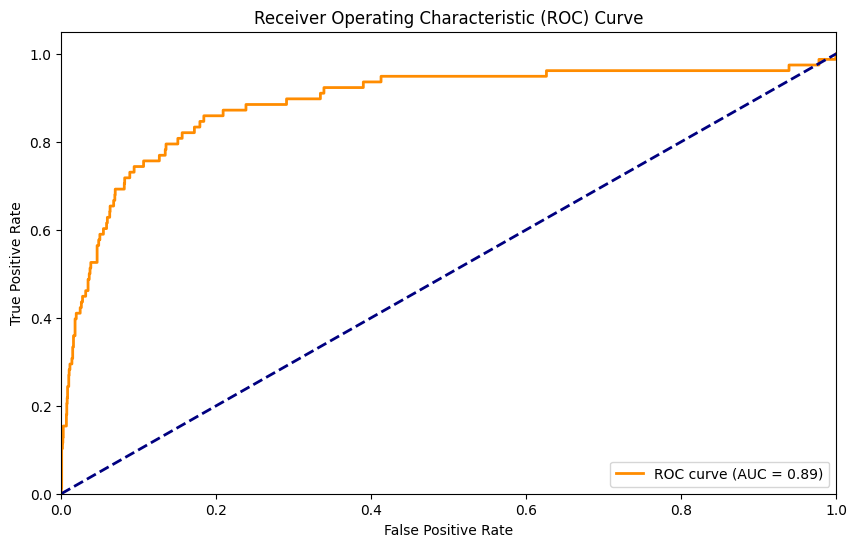

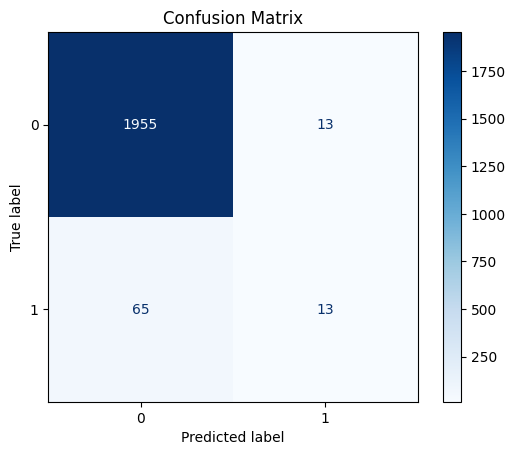

AUC Score: 0.888
F1 Score: 0.250

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.50      0.17      0.25        78

    accuracy                           0.96      2046
   macro avg       0.73      0.58      0.62      2046
weighted avg       0.95      0.96      0.95      2046



In [9]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# # Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# # Calculate F1 score
f1 = f1_score(y_test, y_pred_lr)

# # Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# # Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Key Takeaways: 

Model Performance: The model performs well for predicting non-bankrupt companies but fails to effectively predict bankrupt companies.

Imbalanced Dataset: The low recall and F1 score for bankrupt companies suggest that the model struggles with the minority class (bankrupt companies). This imbalance is leading to many false negatives for bankrupt companies.

Focus on Recall for Bankruptcy: Given that the goal is to predict bankruptcy (class 1), improving the model's recall for this class is crucial. Techniques like SMOTE (oversampling the minority class) or using class weights to penalize false negatives might improve performance.


In [11]:
#Random Forest
# create training and test data
y_rf = np.array(data['Bankrupt?'])
x_rf = np.array(data.drop('Bankrupt?', axis=1))


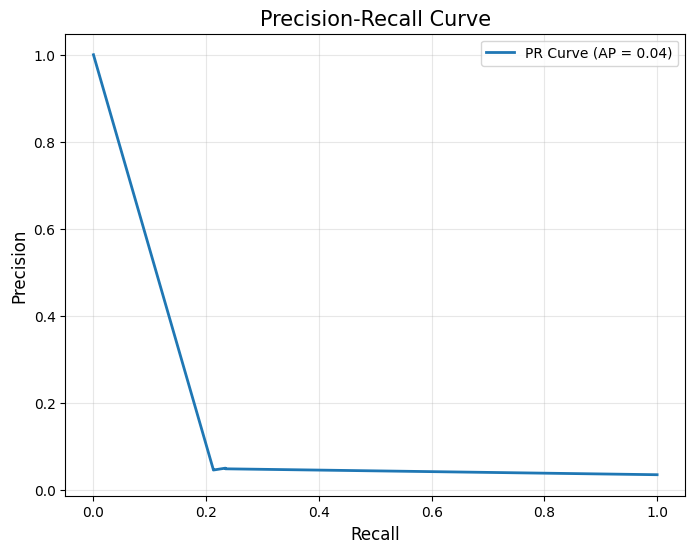

In [24]:
# Split the data into training and test data
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf,y_rf,test_size=0.2,random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train_rf, y_train_rf)

# Train a new model after imputing missing values of training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,oob_score=True)
rf_model.fit(x_train_rf, y_train_rf)

# Predict probabilities
y_pred_probs_rf = model.predict_proba(x_test_rf)[:, 1]

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs_rf)
avg_precision = average_precision_score(y_test, y_pred_probs_rf)

# Plot the Precision-Recall Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=15)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [26]:
# # Create and plot confusion matrix
cm = confusion_matrix(y_test_rf, y_pred_probs_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# # Calculate F1 score
f1 = f1_score(y_test_rf, y_pred_probs_rf)
print(f'F1 Score: {f1:.3f}')

# # Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_probs_rf))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

#### Useful for Bankruptcy prediction

Profitability: ROA (A, B, or C), Operating Profit Rate, Net Income to Total Assets.

Liquidity: Current Ratio, Quick Ratio, Working Capital to Total Assets.

Leverage: Debt Ratio %, Total Debt/Net Worth, Interest Expense Ratio.

Cash Flow: Cash Flow to Total Assets, Cash Flow to Liability, Cash Flow to Sales.

Activity: Total Asset Turnover, Inventory Turnover Rate.